# Project: Classification - Loan Eligibility Prediction
**Marks: 30**

Dear Learner,

Welcome to project on Classification. We will use the credit risk data for the exercise.
Do read the problem statement and the guidelines around the same.

----
## Context: 
-------

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

---------
## Objective:
------------
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

--------
## Attributes Information:
------------

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N)

---------------------------
## Guidelines
-----------------------------------------
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- You can use Jupyter Notebook/ Google Colab(recommended) for this assessment.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

### Import Libraries and Load Dataset

##Feedback for Loan Eligibility: 1) Basic EDA was done and various visualizations were also plotted. Good explanations were provided in most of the graphs as well. Missing values were treated well. 2) Proportions of target variable was checked well. 3) Bivariate analysis was done well. Good usage of pair plots and cross tab as asked. 4)Data set was split into train and test data using the train_test_split function. Good usage of random_state parameter to maintain the uniformity in the split. Also, categorical variables were converted to numerical using dummy variables. 5) Logistic Regression model was created well. Good work with the parameters. The model was evaluated using the confusion matrix and classification report. Model coefficients were also printed. 6) KNN model was created well. Good work with the parameters and liked the scree plot that you have done. The model was evaluated using the confusion matrix and classification report. Scope for Improvement: 1) You can further tune the logistic regression model using GridsearchCV to optimize it further. This way you can find out the best parameters of the model. 2) Business Insights were not shared. You could have shared the business insights. Due to this, 2 marks were deducted. Overall it was a great assignment.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
df.shape

(614, 13)

### Exploring data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [7]:
#Lets analysze the distribution of the various attribute

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can't happen so no need to fill these values`

In [8]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [9]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


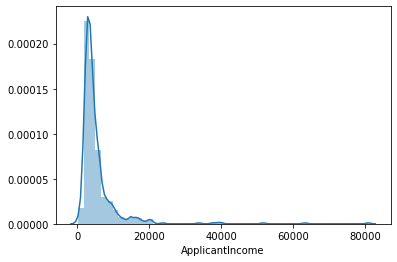

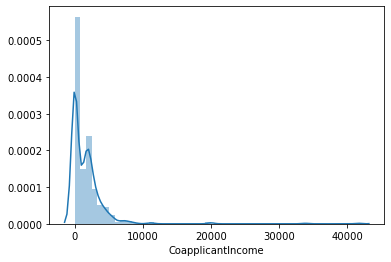

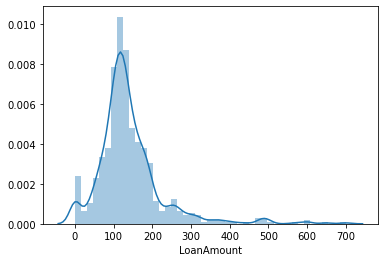

In [14]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [10]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [11]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [12]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

### Complete the below snippets to generate the countplots for all the categorical columns (1 mark)

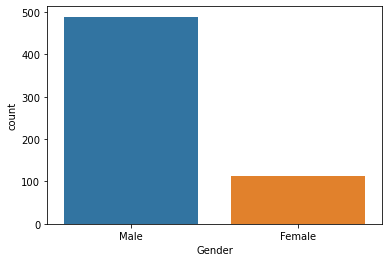

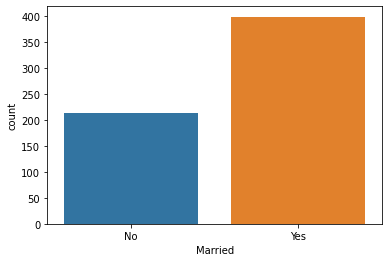

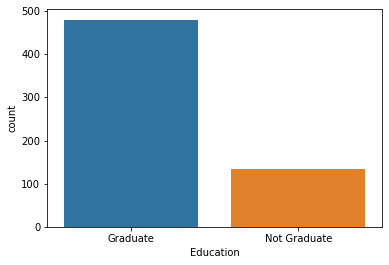

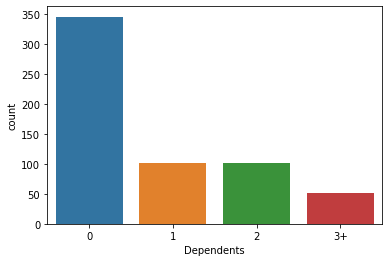

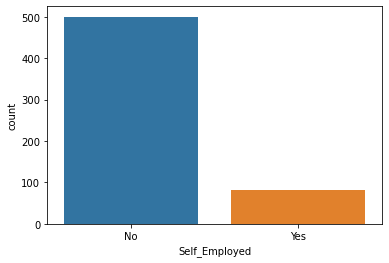

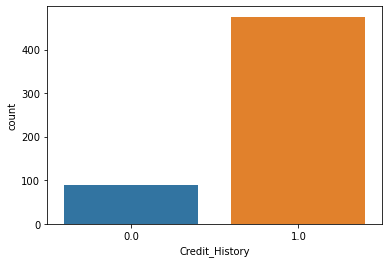

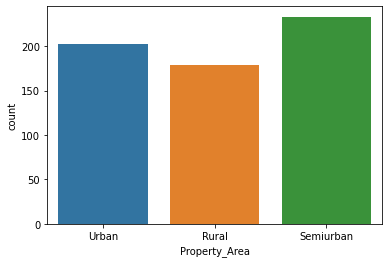

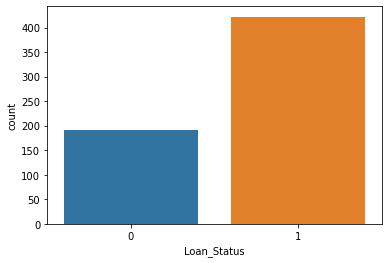

In [13]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(df[i])
    plt.show()


### Calculate proportions of 1s and 0s in loan status and comment on the error rate if our model predicted everyone as eligible for loan (1 mark)

In [14]:
# Calculate baseline proportion. Comment on the error rate if our model predicted everyone as eligible for a loan.
cr_df['Loan_Status'].value_counts(normalize = True)
# You code here


1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

**Insights:**
The proportion of approved people: 68.72% and the proportion of rejected people: 31.27% and if our model predicted everyone as eligible for loan, the error rate is

### Null Values Treatment (4 marks)

- Fill Credit history and Dependents null values with 0
- Fill self employed null values with 'No'
- Fill null values in gender where CoapplicantIncome is 0 with female and all other missing values as males. Comment on why this makes sense.

In [15]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
# Your code here for all the requirements above. Use more cells if required.
# Your code here for all the requirements above. Use more cells if required.

#Fill Credit history and Dependents null values with 0
cr_df['Credit_History'].fillna(0, inplace = True)
cr_df['Dependents'].fillna(0,inplace = True)

#Fill self employed null values with 'No'
cr_df['Self_Employed'].fillna("No",inplace = True)

#Fill null values in gender where CoapplicantIncome is 0 with female and all other missing values as males. Comment on why this makes sense.
cr_df['Gender'] = np.where(cr_df['CoapplicantIncome'] == 0, '',"female")
cr_df['Gender'] = np.where(cr_df['CoapplicantIncome'] > 0, '',"male")



In [17]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [18]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,male,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,male,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Propert_Area is Urban then mostly they are married.(mode)`

In [19]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [20]:
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Bivariate Analysis (3 marks)

- Draw a pairplot with Loan_Status hue. Comment on the visualisation
- Use group by on loan status and figure out the mean and median values of other numerical features per loan status category.
- Create a cross tab for dependents and loan status and state on the findings
- Create a cross tab for the property type and loan status and state the findings


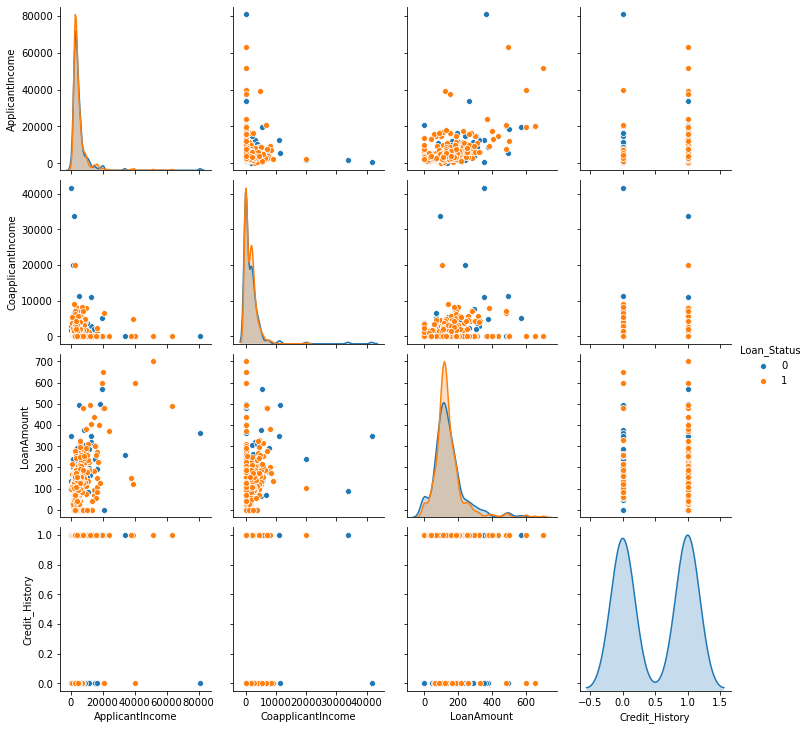

In [21]:
# Your Code here for the pairplot
sns.pairplot(cr_df, hue="Loan_Status")
plt.show()
    


In [22]:
# Uncomment below and fill in the blank
cr_df.Loan_Status.median()
cr_df.Loan_Status.mean()




0.6872964169381107

In [28]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')





Loan_Status,0,1
Gender,,
,0.281525,0.718475
male,0.351648,0.648352


In [29]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')


Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [30]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')


Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [31]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')


Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [32]:
# Your code here for cross tabs
#Create a cross tab for dependents and loan status and state on the findings
#Create a cross tab for the property type and loan status and state the findings

pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='index')


Loan_Status,0,1
Dependents,,
0,0.400000,0.600000
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


In [33]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


### Data Preparation (2 marks)
- Split the data into independent and dependent variables 
- create dummy variables wherever necessary and add in the independent features set

In [34]:
# Define X and Y variables

# Uncomment below to answer
X = cr_df.drop(columns = {'Loan_Status'})
Y = cr_df['Loan_Status'].astype('category') 



In [35]:
# Convert categorical vriables to dummy variables

#Uncomment below to answer

X = pd.get_dummies(X, drop_first=True)



In [36]:
## Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

### Model building using Logistic Regression from Sklearn (10 marks)

- Fit a Logistic Regression model on all of the train data (2 marks)
- Predict on the test data and append the predictions as a column in the test set (2 marks)
- Complete the function to draw a confusion matrix and pass on the test set predictions along with actual values to generate the consfusion matrix as a heatmap (3 marks)
- Generate the classification report using the classification_report funciont(1 mark)
- Store the model coeffs in a dataframe (2 marks)
-

In [37]:
from sklearn.metrics import classification_report, classification_report
from sklearn.linear_model import LogisticRegression

# Uncomment and answer below
logreg = LogisticRegression(random_state=42,fit_intercept=False)
logreg.fit(X_train,Y_train)
# fit the model on train data


LogisticRegression(fit_intercept=False, random_state=42)

In [38]:
#Uncomment to answer
y_predict = logreg.predict(X_test)     # Predicting the target variable on test data\




In [39]:
#  
z = X_test.copy()

# Uncomment below to answer
z['Observed Loan Status'] = Y_test
z['Predicted Loan Status'] = y_predict
z.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Observed Loan Status,Predicted Loan Status
220,2221,0.0,60,0.0,1,1,1,0,0,0,0,0,0,1,0,0
109,2071,754.0,94,1.0,0,1,0,0,0,1,1,0,1,0,1,1
569,3166,2064.0,104,0.0,0,1,1,0,0,0,0,0,0,1,0,0
330,4384,1793.0,117,1.0,0,0,0,1,0,0,0,0,0,1,1,1
407,2213,0.0,66,1.0,1,0,1,0,0,0,1,0,0,0,1,1


In [43]:
## function to get confusion matrix in a proper format

# Uncommment below to answer


def draw_cm( actual, predicted ) :
    cm = confusion_matrix( actual, predicted ) 
    sns.heatmap(cm, annot= True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Y_test')
    plt.xlabel('y_predict')
    plt.show()




In [65]:
print(classification_report(Y_test, y_predict))




              precision    recall  f1-score   support

           0       0.77      0.44      0.56        61
           1       0.77      0.94      0.85       124

    accuracy                           0.77       185
   macro avg       0.77      0.69      0.70       185
weighted avg       0.77      0.77      0.75       185



In [ ]:
# Coefficients 
# Uncomment below to answer
fi = pd.DataFrame()
fi['Col'] = np.transpose(fi.coef_.tolist()[0]))
fi['Coeff'] = np.round(abs(_____________),2)
fi.sort_values(by='Coeff',ascending=False)

### kNN model Building (10 marks)

- For every value of K, split the train set into new train and validation set 30 times and take the average of the error on these train and the validation sets per k. Create a dictionary that stores the average train and validation error for all Ks from 1 to 14.  (2 marks)

- Use the dictionary to plot the average train vs the validation set error for all ks. (2 mark) 

- Choose the apt k from the plot where the two errors are comparable and fit the entire training set and predict on the test set. (1 mark)

- Store the results of the test set in the dataframe created above. (1 mark)

- Draw confusion matrix calling the function created above.(1 marks)

- print the classification report(1 mark) 
- Provide business insights for the entire modelling process (including logistic regression)(2 marks)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
ss = StandardScaler()

# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of the k to determine the best k

train_error = []
test_error = []
knn_many_split = {}

error_df_knn = pd.DataFrame()
features = X.columns

# Uncomment below and fill in the blanks

for k in range(1,15):
   train_error = []
   test_error = []
   lista = []
   knn = KNeighborsClassifier(n_neighbors=k)
   for i in range(1,15):
     x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.20)

#let us scale the data. Notice the scaling done in the videos.

     x_train = ss.fit_transform(x_train)
     x_val = ss.transform(x_val) # transform the validation set
     knn.fit(x_train, y_train)
     train_error.append(1 - knn.score(x_train, y_train)) 
     test_error.append(1 - knn.score(x_val, y_val))
     lista.append(sum(train_error)/len(train_error))
     lista.append(sum(test_error)/len(test_error))
     knn_many_split[k] = lista

knn_many_split

{1: [0.0,
  0.40697674418604646,
  0.0,
  0.42441860465116277,
  0.0,
  0.4069767441860465,
  0.0,
  0.3953488372093023,
  0.0,
  0.40232558139534885,
  0.0,
  0.38953488372093026,
  0.0,
  0.3887043189368771,
  0.0,
  0.39534883720930236,
  0.0,
  0.3979328165374677,
  0.0,
  0.3883720930232558,
  0.0,
  0.379492600422833,
  0.0,
  0.3808139534883721,
  0.0,
  0.37835420393559926,
  0.0,
  0.37624584717607973],
 2: [0.13994169096209907,
  0.4534883720930233,
  0.15014577259475215,
  0.4127906976744186,
  0.1496598639455782,
  0.4069767441860465,
  0.14577259475218657,
  0.41860465116279066,
  0.14693877551020407,
  0.4209302325581395,
  0.15160349854227403,
  0.4341085271317829,
  0.15243648479800084,
  0.4401993355481727,
  0.15306122448979592,
  0.440406976744186,
  0.15711046323291222,
  0.42894056847545214,
  0.1577259475218659,
  0.4220930232558139,
  0.15637423800689107,
  0.42494714587737836,
  0.1552478134110787,
  0.4282945736434108,
  0.1540704193765418,
  0.4275491949910553

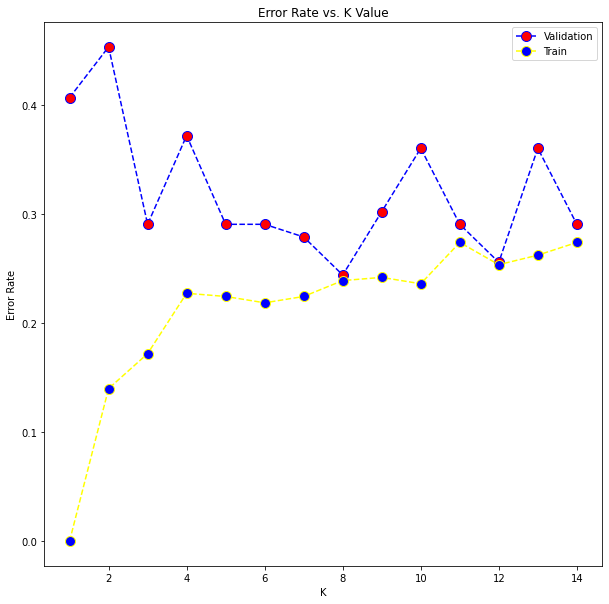

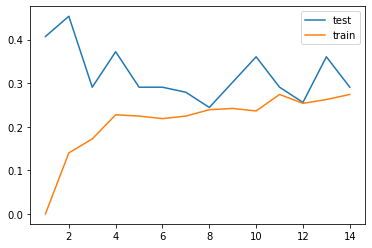

In [95]:
# Extracting k and the test error in a list for easy plotting

kltest = []
vltest = []
for k, v in knn_many_split.items():
  kltest.append(k)
  vltest.append(knn_many_split[k][1])

kltrain = []
vltrain = []

for k, v in knn_many_split.items():
  kltrain.append(k)
  vltrain.append(knn_many_split[k][0])

# Plotting k vs error error

plt.figure(figsize=(10,10))
plt.plot(kltest,vltest,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.plot(kltrain,vltrain,color='yellow', linestyle='dashed', marker='o',
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.legend(labels=['Validation','Train'])
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#Uncomment and answer

plt.plot(kltest, vltest, label = 'test' )
plt.plot(kltrain, vltrain, label = 'train')
plt.legend()
plt.show()

In [96]:
#Uncomment and answer

knn = KNeighborsClassifier(n_neighbors = 8)

knn.fit(X_train, Y_train)

y_pred= knn.predict(X_test)

z["5NN predictions"]  = y_pred



In [67]:
#Your code 

def draw_cm1( actual, predicted ):
    
    cm1 = confusion_matrix(Y_test, y_pred)
    sns.heatmap(cm, annot= True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

    plt.show()

#Call function here -


In [98]:
# Print the classification report here
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.20      0.28        61
           1       0.70      0.90      0.79       124

    accuracy                           0.67       185
   macro avg       0.60      0.55      0.53       185
weighted avg       0.63      0.67      0.62       185



## <a id = "link8"></a>Business Insights 

*Add insights here and comment on the best model*